### Team
##### Swaroop Bhandary
##### Vajra Ganeshkumar
##### Supriya Vadiraj

# Task1 
##Compare the outcomes of different implementations of KDEs.

There are several options available for computing KDE in Python.
- SciPy: gaussian_kde.
- Statsmodels: KDEUnivariate and KDEMultivariate.
- Scikit-learn: KernelDensity.


##1). Generate synthethic data and plot them
Generate synthetic dataset the distribution of which can be presented as a combination of three Gausian distributions with the following parameters: $\mu_1$=1, $\sigma_1$=1 and $\mu_2$=8, $\sigma_2$=2 and $\mu_2$=14, $\sigma_2$=1.5. Generate 1000 samples from the distribution.
<br>
Plot the pdf of this distribution and the generated samples.
<br>
3) Use the generated samples to perform 
- (i) KDE with Scipy, 
- (ii) Univariate KDE with Statsmodels, 
- (iii) Multivariate KDE with Statsmodels as well as 
- (iv) KDE with Scikit-learn.
<br>
4) Plot all four distributions on one figure.  

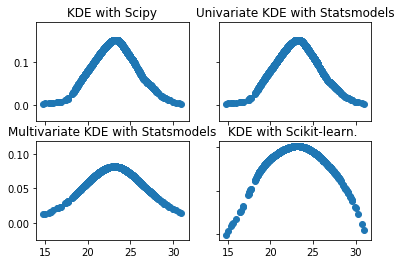

In [36]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import statsmodels.api as sm
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from sklearn.neighbors.kde import KernelDensity


first_guassian = np.random.normal(1,1,1000)
second_guassian = np.random.normal(8,2,1000)
third_guassian = np.random.normal(14,1.5,1000)

final = first_guassian+second_guassian+third_guassian


estimated_values_scipy = gaussian_kde(final)
estimated_values_univariate_statsmodel = sm.nonparametric.KDEUnivariate(final)
estimated_values_univariate_statsmodel.fit()
estimated_values_multivariate_statsmodel = KDEMultivariate(final, var_type = 'o')
final = final[:,np.newaxis]

kde = KernelDensity(kernel='gaussian').fit(final)
pdf = kde.score_samples(final)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

ax1.label_outer()
ax2.label_outer()
ax3.label_outer()
ax4.label_outer()

ax1.set_title("KDE with Scipy")
ax1.scatter(final, estimated_values_scipy.pdf(final[:,0]))

ax2.set_title("Univariate KDE with Statsmodels")
ax2.scatter(final, estimated_values_univariate_statsmodel.evaluate(final[:,0]))

ax3.set_title("Multivariate KDE with Statsmodels")
ax3.scatter(final, estimated_values_multivariate_statsmodel.pdf(final[:,0]))

ax4.set_title("KDE with Scikit-learn. ")
ax4.scatter(final, pdf)


plt.show()